In [3]:
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
df=pd.read_csv("C:/Users/RGUKT/OneDrive/Desktop/internship_task5/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age']=df['Age'].mean()

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Embarked']=df['Embarked'].astype(str)
df['Embarked'].fillna('unknown',inplace=True)
df['Cabin']=df['Cabin'].astype(str)
df['Cabin'].fillna('unknown',inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Text(0.5, 0.98, 'pairwase Relationshp by survival')

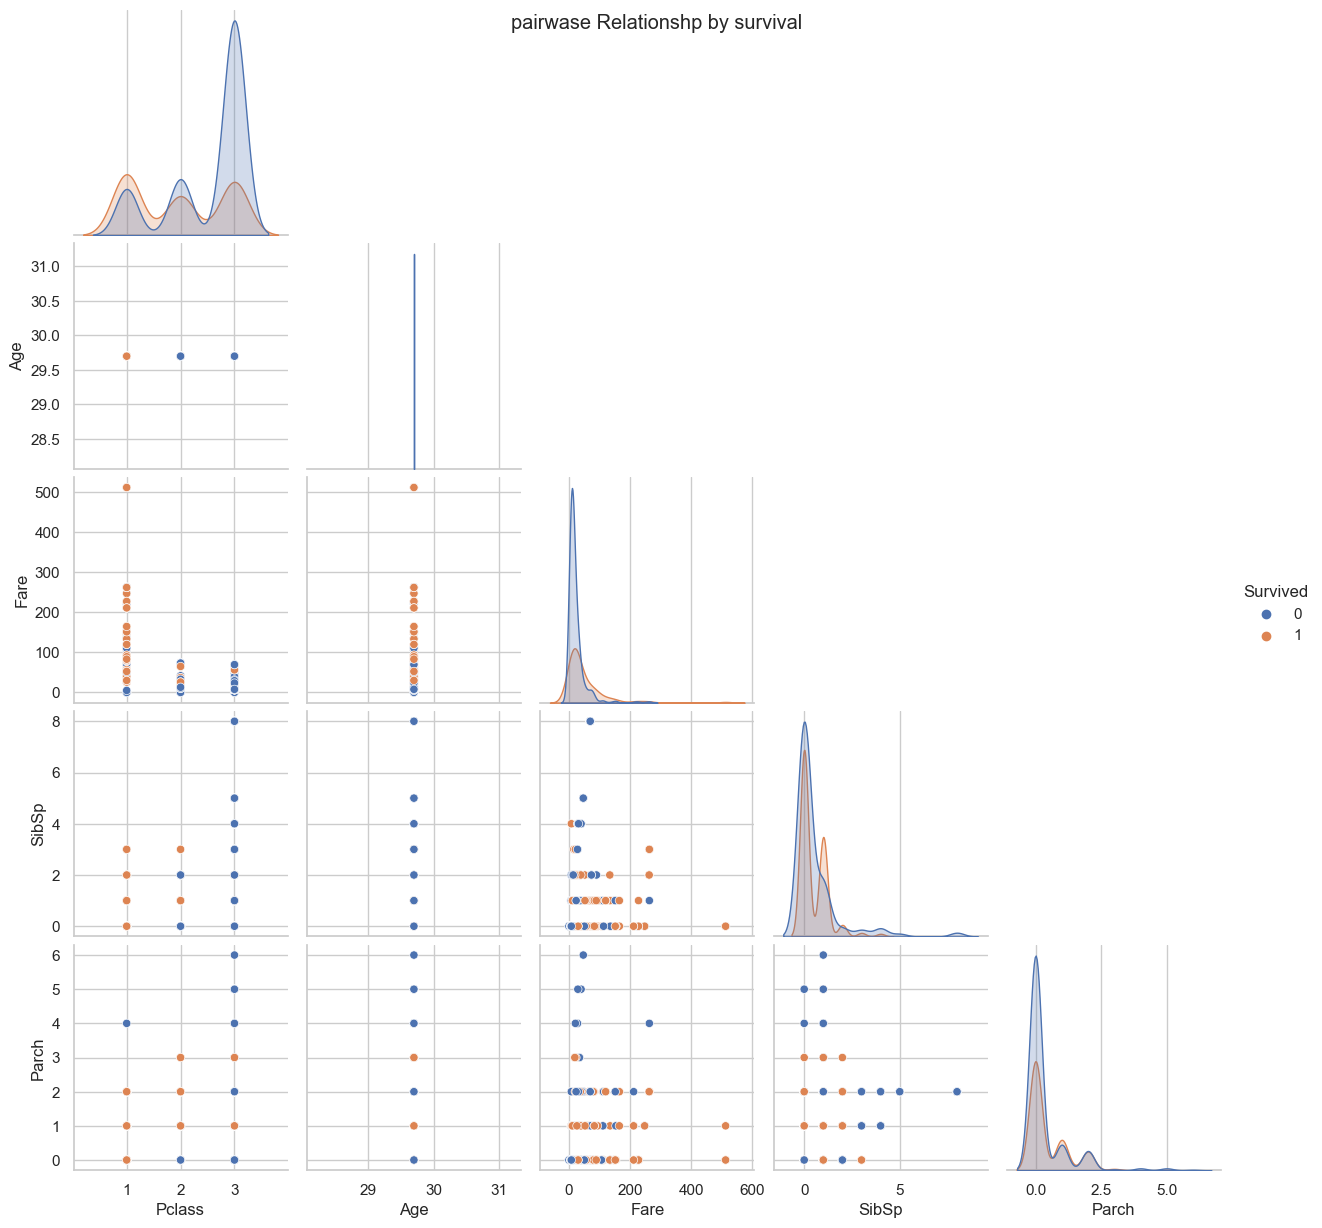

In [12]:
numeric_features=['Survived','Pclass','Age','Fare','SibSp','Parch']
sns.pairplot(df[numeric_features],hue='Survived',corner=True)
plt.suptitle("pairwase Relationshp by survival")



Text(0.5, 1.0, 'Correlation Heatmap')

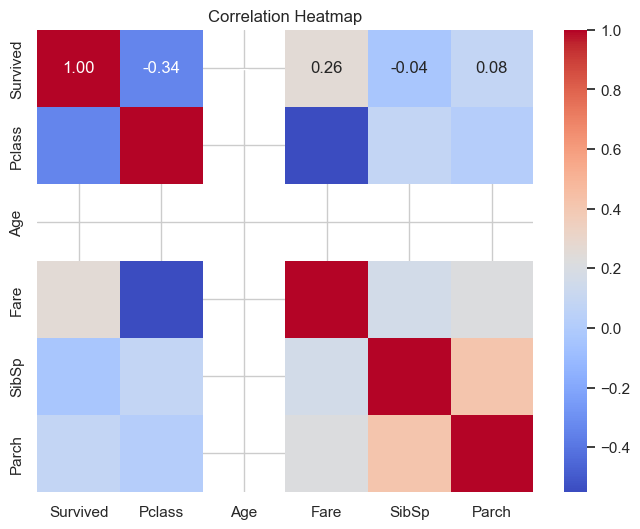

In [13]:

corr = df[numeric_features].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")


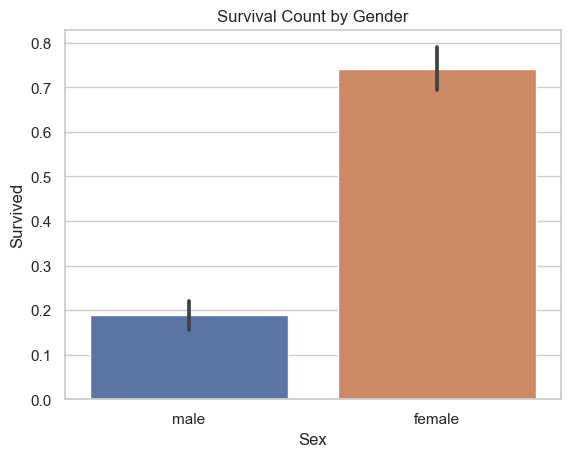

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.barplot(data=df, x='Sex',y='Survived')
ax.set_title("Survival Count by Gender")
plt.show()


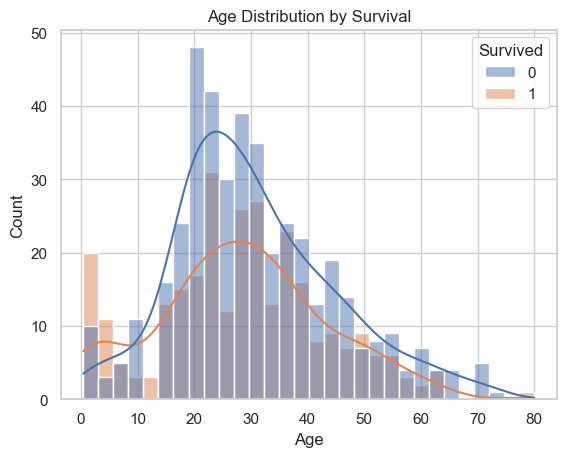

In [5]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


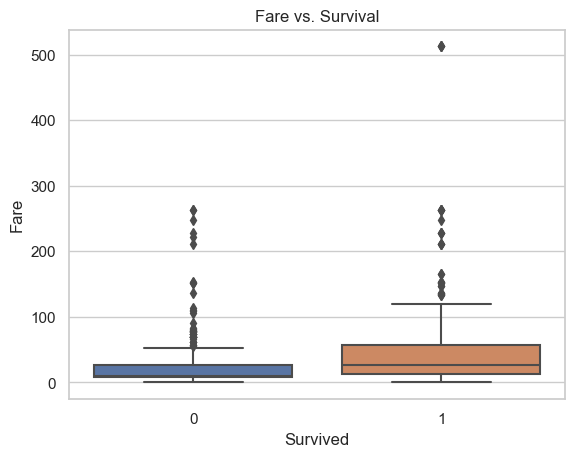

In [7]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare vs. Survival")
plt.show()


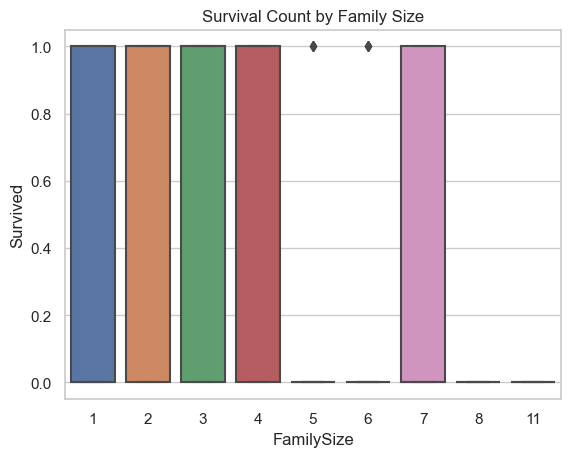

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.boxplot(data=df, x='FamilySize', y='Survived')
plt.title("Survival Count by Family Size")
plt.show()


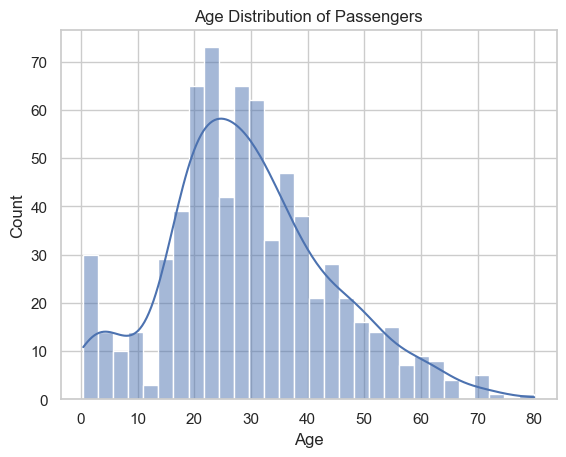

In [8]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


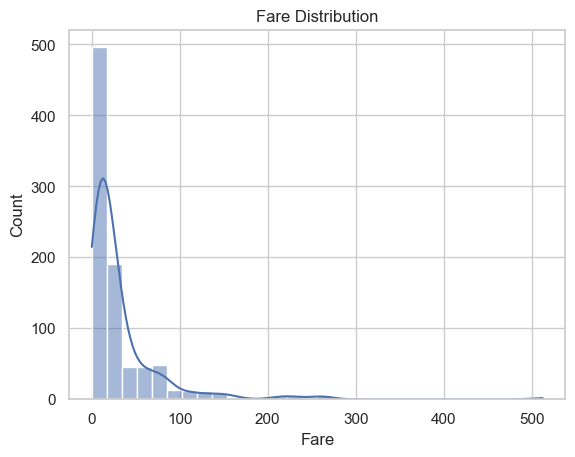

In [78]:
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


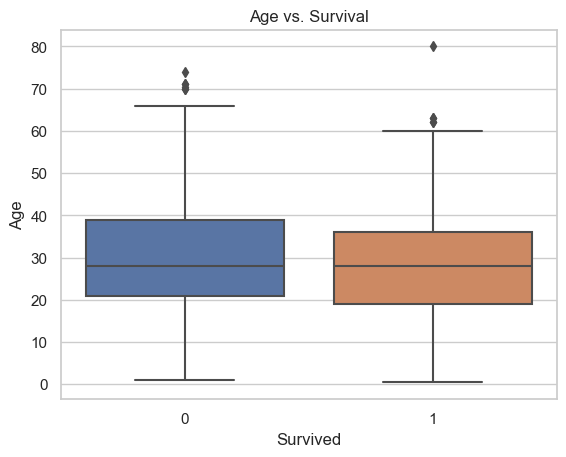

In [9]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs. Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


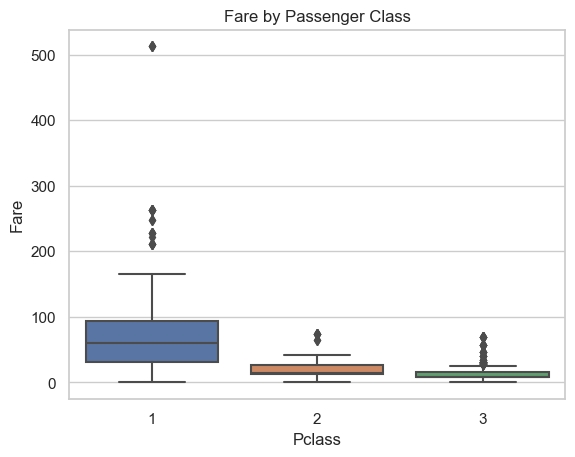

In [80]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()


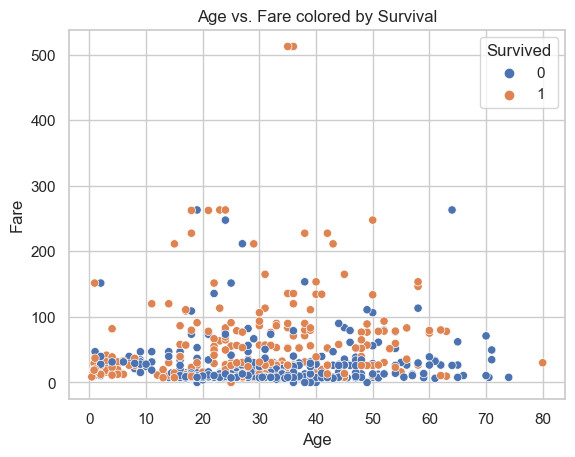

In [10]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("Age vs. Fare colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


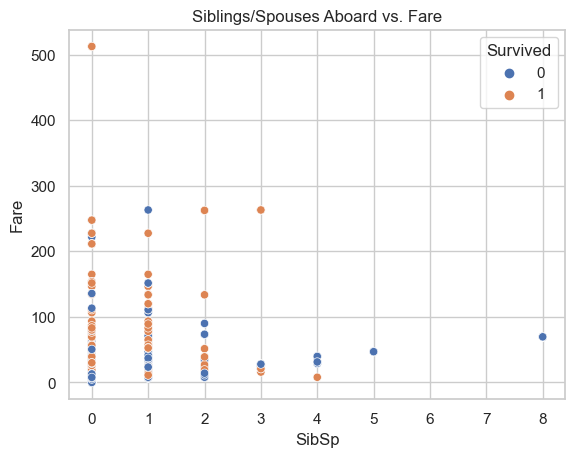

In [11]:
sns.scatterplot(data=df, x='SibSp', y='Fare', hue='Survived')
plt.title("Siblings/Spouses Aboard vs. Fare")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

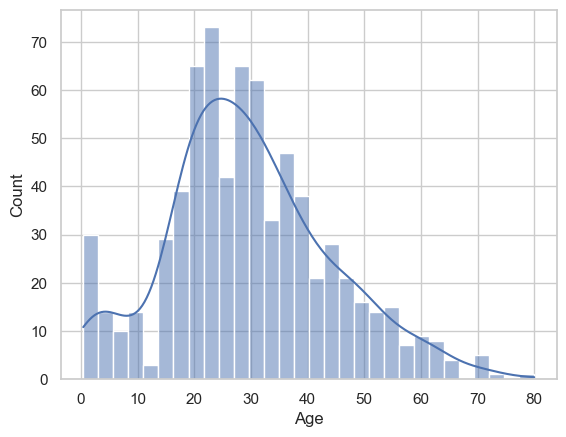

In [12]:
sns.histplot(data=df, x='Age', bins=30, kde=True)


<Axes: xlabel='Fare', ylabel='Count'>

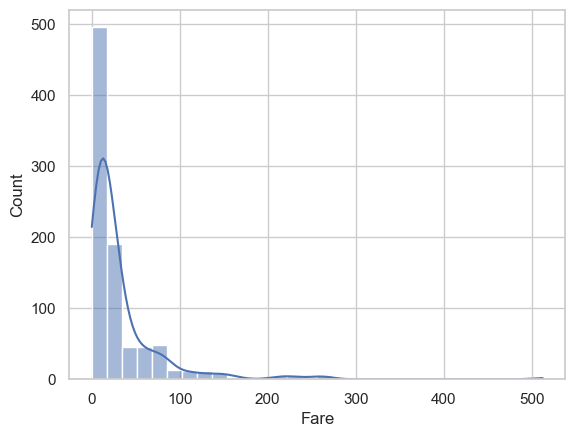

In [13]:
sns.histplot(data=df, x='Fare', bins=30, kde=True)


<Axes: xlabel='Survived', ylabel='Age'>

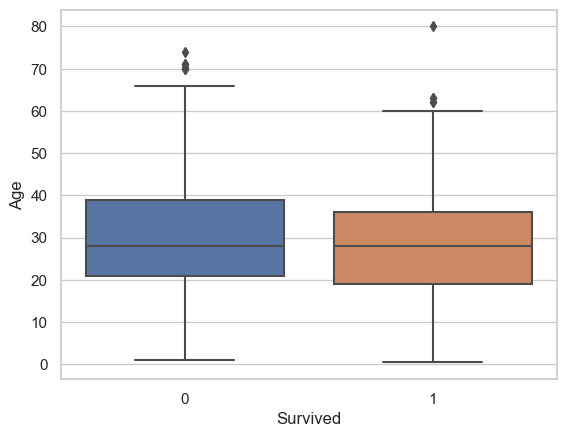

In [14]:
sns.boxplot(data=df, x='Survived', y='Age')


<Axes: xlabel='Pclass', ylabel='Fare'>

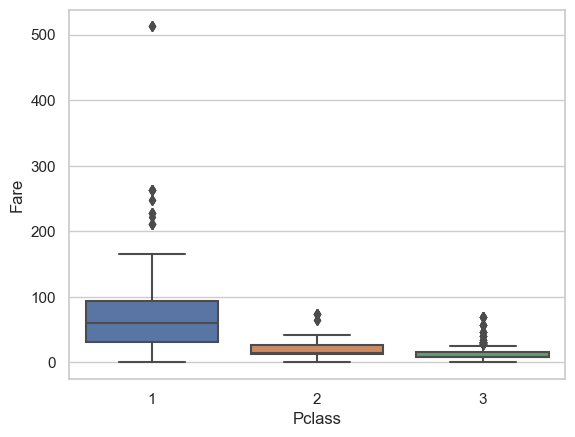

In [86]:
sns.boxplot(data=df, x='Pclass', y='Fare')


<Axes: xlabel='Age', ylabel='Fare'>

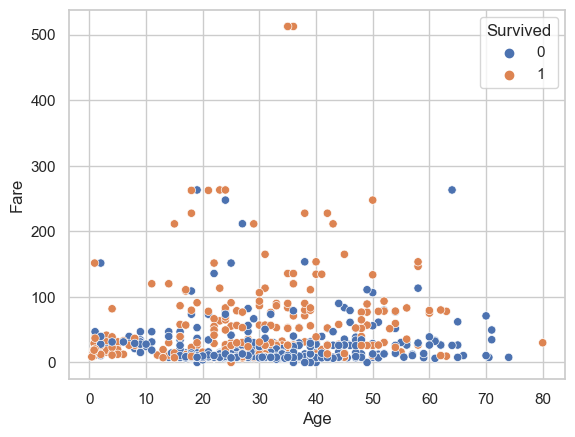

In [15]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')


<Axes: xlabel='SibSp', ylabel='Fare'>

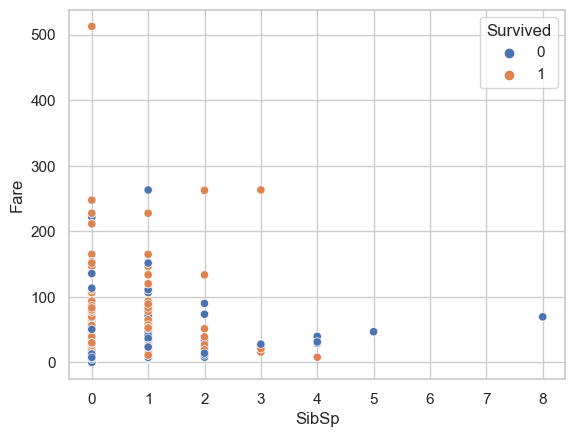

In [16]:
sns.scatterplot(data=df, x='SibSp', y='Fare', hue='Survived')
